In [3]:
# Import packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import warnings
import glob
import baseline
import file_read

In [4]:
dict_1,n_cycle=file_read.read_file('../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
df = file_read.data_frame(dict_1,1)
df.head()

../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened


,Potential,Current
0,-0.100027,0.000003
1,-0.100606,0.000003
2,-0.101023,0.000003
3,-0.101555,0.000003
4,-0.102163,0.000003


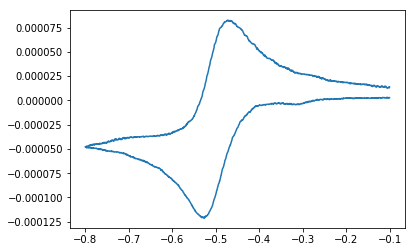

In [5]:
%matplotlib inline
plt.plot(df['Potential'],df['Current'])

In [6]:
x = pd.to_numeric(df['Potential'])
y = pd.to_numeric(df['Current'])

In [7]:
x1,x2=baseline.split(x)
y1,y2=baseline.split(y)

In [8]:
len(x)

2801

In [28]:
def critical_idx(x, y): ## Finds index where data set is no longer linear 
    """
    This function takes x and y values callculate the derrivative of x and y, and calculate moving average of 5 and 15 points.
    Finds intercepts of different moving average curves and return the indexs of the first intercepts.
    """
    k = np.diff(y)/(np.diff(x)) #calculated slops of x and y

    ## Calculate moving average for 5 and 15 points.
    ## This two arbitrary number can be tuned to get better fitting.
    ave5 = []
    ave15 = []
    for i in range(len(k)-10):  # The reason to minus 5 is to prevent j from running out of index.
        a = 0 
        for j in range(0,10):
            a = a + k[i+j]
        ave5.append(round(a/10, 5)) # keeping 9 desimal points for more accuracy
    
    for i in range(len(k)-15): 
        b = 0 
        for j in range(0,15):
            b = b + k[i+j]
        ave15.append(round(b/15, 5))
    ave5i = np.asarray(ave5)
    print(ave5i)
    ave15i = np.asarray(ave15)
    print(ave15i)
    ## Find intercepts of different moving average curves
    idx = np.argwhere(np.diff(np.sign(ave15i - ave5i[:len(ave15i)])!= 0)).reshape(-1)+0 #reshape into one row.
    plt.plot(x[idx], ave5i[idx], 'ro') ## Plot intersections 
    plt.plot(x[0:len(ave15)],ave15, x[0:len(ave5)], ave5) ## Plot moving averages
    print(len(idx))
    mid = int(len(idx) / 2)
    print(mid)
    return idx[mid]

[ 2.e-05  3.e-05 -9.e-05 ...  0.e+00 -8.e-05 -9.e-05]
[-1.e-05  4.e-05 -1.e-05 ... -1.e-05 -1.e-04 -8.e-05]
150
75


867

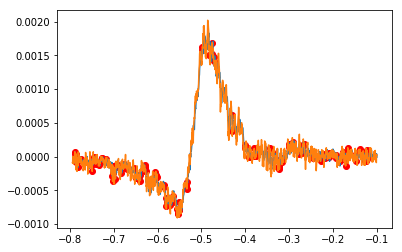

In [29]:
critical_idx(x1,y1)

In [30]:
def finds_critical_idx(x, y): ## Finds index where data set is no longer linear 
	
	dy = np.diff(y)/(np.diff(x))
	
	## Calculate moving average for 20 and 50 points
	ma20 = []
	ma50 = []

	for i in range(len(dy)-10): 
		soma = 0 
		for k in range(0,10):
			soma = soma + dy[i+k]
		ma20.append(round(soma/10, 3))
		
	for i in range(len(dy)-15): 
		soma = 0 
		for k in range(0,15):
			soma = soma + dy[i+k]
		ma50.append(round(soma/15, 3))

	## Find intercepts of different moving average curves
	ma20_num = np.array(ma20)
	ma50_num = np.array(ma50)
	idx = np.argwhere(np.diff(np.sign(ma50_num - ma20_num[:len(ma50)]))!= 0).reshape(-1)+0
	print(ma20_num)
	print(ma50_num)
	## Uncomment to check whats going on 
	plt.plot(x[idx], ma20_num[idx], 'ro') ## Plot intersections 
	plt.plot(x[0:len(ma50)], ma50, x[0:len(ma20)], ma20) ## Plot moving averages

	return idx[0]


In [63]:
critical_idx(x1,y1)

[ 2.e-05  3.e-05 -9.e-05 ...  0.e+00 -8.e-05 -9.e-05]
[-1.e-05  4.e-05 -1.e-05 ... -1.e-05 -1.e-04 -8.e-05]


array([  43,   44,   45,   46,   51,   52,   77,   78,   94,   95,  132,
        133,  142,  143,  155,  156,  159,  160,  166,  167,  184,  186,
        216,  217,  218,  219,  234,  235,  242,  243,  255,  256,  291,
        292,  302,  303,  331,  332,  338,  339,  356,  357,  382,  383,
        400,  401,  433,  434,  445,  446,  447,  448,  477,  478,  488,
        489,  548,  550,  559,  560,  583,  584,  599,  600,  660,  662,
        743,  744,  750,  751,  763,  764,  795,  796,  866,  867,  871,
        872,  900,  901,  904,  905,  908,  909,  929,  930,  945,  946,
        957,  958,  961,  962,  970,  971, 1004, 1005, 1010, 1011, 1054,
       1055, 1056, 1057, 1058, 1059, 1081, 1082, 1086, 1087, 1096, 1097,
       1107, 1108, 1141, 1142, 1149, 1151, 1152, 1153, 1166, 1167, 1180,
       1181, 1191, 1192, 1202, 1203, 1205, 1206, 1237, 1238, 1245, 1246,
       1251, 1252, 1267, 1268, 1280, 1282, 1290, 1291, 1298, 1299, 1350,
       1351, 1365, 1366, 1372, 1373, 1375, 1377])

In [9]:
def mean(vector):
    """
    This function returns the mean values.
    """
    a = 0
    for i in vector:
        a = a + i
    return a/len(vector)
def linear_coeff(x, y):
    """
    This function returns the inclination coeffecient and y axis interception coeffecient m and b. 
    """
    m = (y-mean(y)) / (x - mean(x))    
    b = mean(y) - m * mean(x)
    return m, b

In [34]:
linear_coeff(x1,y1)

(array([1.14725082e-04, 1.15034656e-04, 1.14144729e-04, ...,
        3.14292902e-05, 3.12381538e-05, 3.07920301e-05]),
 array([ 1.43609258e-05,  1.45001666e-05,  1.40998929e-05, ...,
        -2.31040518e-05, -2.31900216e-05, -2.33906801e-05]))

[ 2.e-05  3.e-05 -9.e-05 ...  0.e+00 -8.e-05 -9.e-05]
[-1.e-05  4.e-05 -1.e-05 ... -1.e-05 -1.e-04 -8.e-05]


0

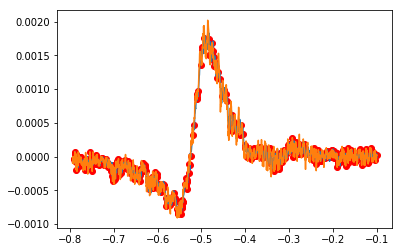

In [62]:
finds_critical_idx(x1, y1)

In [60]:
def linear_coeff(x, y):
    """
    This function returns the inclination coeffecient and y axis interception coeffecient m and b. 
    """
    m = (y-mean(y)) / (x - mean(x))    
    b = mean(y) - m * mean(x)
    return m, b

In [61]:
def y_fitted_line(m, b, x):
    y_base = []
    for i in x:
        y = m * i + b
        y_base.append(y)
    return y_base    

In [60]:
def linear_background(x, y):
    idx = critical_idx(x, y) + 3 #this is also arbitrary number we can play with.
    m, b = linear_coeff(x[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))], y[(idx - int(0.5 * idx)) : (idx + int(0.5 * idx))])
    y_base = y_fitted_line(m, b, x)
    return y_base

[ 2.e-05  3.e-05 -9.e-05 ...  0.e+00 -8.e-05 -9.e-05]
[-1.e-05  4.e-05 -1.e-05 ... -1.e-05 -1.e-04 -8.e-05]


0

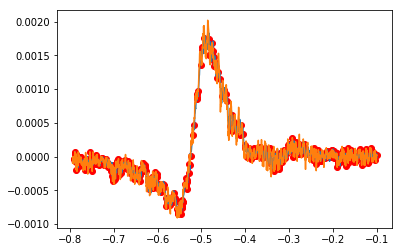

In [61]:
idx = finds_critical_idx(x1, y1)
idx

In [59]:
linear_background(x1,y1)

[ 2.e-05  3.e-05 -9.e-05 ...  0.e+00 -8.e-05 -9.e-05]
[-1.e-05  4.e-05 -1.e-05 ... -1.e-05 -1.e-04 -8.e-05]


TypeError: only size-1 arrays can be converted to Python scalars

In [58]:
#find linear backgroud
y_pred1 = linear_background(x1,y1)
y_pred2 = linear_background(x2,y2)


[ 2.e-05  3.e-05 -9.e-05 ...  0.e+00 -8.e-05 -9.e-05]
[-1.e-05  4.e-05 -1.e-05 ... -1.e-05 -1.e-04 -8.e-05]


TypeError: only size-1 arrays can be converted to Python scalars

In [57]:
#cathodic peak current and potential
max_pos = y2.argmax()
max_pot = x2[max_pos]
max_cur = y2[max_pos] - y_pred2[max_pos]
#Anodic peak current and potential
min_pos = y1.argmin()
min_pot = x1[min_pos]
min_cur = y1[min_pos] - y_pred1[min_pos]
f"For this CV data, the 'Ipc' is {max_cur}, Vpc is {max_pot}, Ipa is {min_cur}, Vpa is {min_pot}"

NameError: name 'y_pred2' is not defined

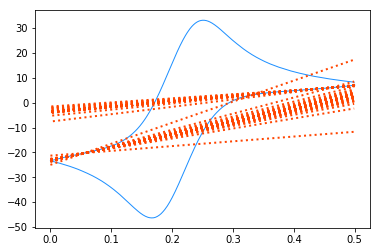

In [12]:
## Plot all data 
plt.plot(x1, y1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(x2, y2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(x1, y_pred1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, y_pred2, color = "orangered", linestyle=':',linewidth=2) 

test.txt Opened
1
2
executed


/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


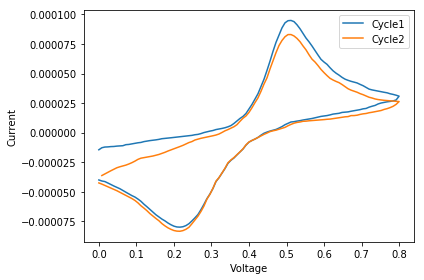

In [13]:
import file_read

In [16]:
dict_1, n_cycle = file_read.read_file('test.txt')

test.txt Opened


In [17]:
df = file_read.data_frame(dict_1, 2)

In [18]:
df.shape

(200, 2)

In [19]:
#c using a b for x and y
a = pd.to_numeric(df['Potential'])
b = pd.to_numeric(df['Current'])

In [20]:
a1,a2=baseline.split_vector(a)
b1,b2=baseline.split_vector(b)
len(b1)

100

10

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


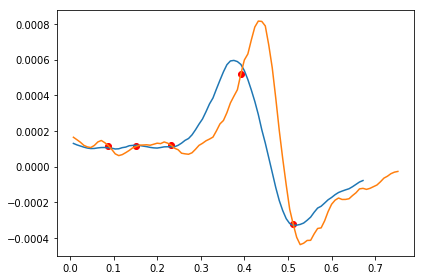

In [21]:
baseline.finds_critical_idx(a1,b1)

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


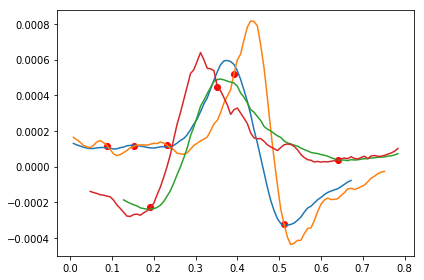

In [22]:
#find linear backgroud
b_pred1 = baseline.calc_linear_background(a1,b1)
b_pred2 = baseline.calc_linear_background(a2,b2)

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


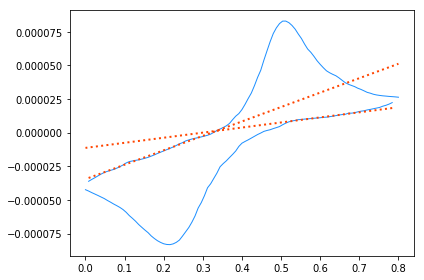

In [23]:
#Plot all data 
plt.plot(a1, b1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(a2, b2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(a1, b_pred1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(a2, b_pred2, color = "orangered", linestyle=':',linewidth=2) 

In [1]:
def sum_value(vetor):
    """
    This function returns the sum of values.
    """
    a = 0
    for x in vetor:
        a = a + x
    return a

In [72]:
def finds_critical_idx(x, y): ## Finds index where data set is no longer linear 
	
	dy = np.diff(y)/(np.diff(x))
	
	## Calculate moving average for 20 and 50 points
	ma20 = []
	ma50 = []

	for i in range(len(dy)-10): 
		soma = 0 
		for k in range(0,10):
			soma = soma + dy[i+k]
		ma20.append(round(soma/10, 3))
		
	for i in range(len(dy)-15): 
		soma = 0 
		for k in range(0,15):
			soma = soma + dy[i+k]
		ma50.append(round(soma/15, 3))

	## Find intercepts of different moving average curves
	ma20_num = np.array(ma20)
	ma50_num = np.array(ma50)
	idx = np.argwhere(np.diff(np.sign(ma50_num - ma20_num[:len(ma50)]))!= 0).reshape(-1)+0
	
	## Uncomment to check whats going on 
	plt.plot(x[idx], ma20_num[idx], 'ro') ## Plot intersections 
	plt.plot(x[0:len(ma50)], ma50, x[0:len(ma20)], ma20) ## Plot moving averages

	return idx[0]


In [45]:
dy = np.diff(y1)/(np.diff(x1))  #delta y / delta x
len(dy)
#plt.plot(a1[:99],dy)

1399

In [48]:
ma10=[]
for i in range(len(dy)-10): 
		soma = 0 
		for k in range(0,10):
			soma = soma + dy[i+k]
		ma10.append(round(soma/10, 8))
len(ma10)
ma20=[]
for i in range(len(dy)-20): 
		soma = 0 
		for k in range(0,20):
			soma = soma + dy[i+k]
		ma20.append(round(soma/10, 8))
len(ma20)

1379

In [58]:
idx = np.argwhere(np.diff(np.sign(np.array(ma20) - np.array(ma10)[:len(ma20)]))!= 0).reshape(-1)
idx

array([   3,   13,   23,   31,   35,   36,   40,   45,   46,   50,   56,
         57,   58,   59,   60,   61,   62,   65,   75,   82,   83,   84,
         92,   93,   94,  101,  103,  104,  111,  113,  114,  116,  117,
        118,  119,  120,  123,  124,  126,  127,  128,  129,  130,  136,
        137,  138,  145,  146,  149,  154,  155,  170,  173,  175,  176,
        178,  180,  183,  188,  189,  198,  199,  201,  202,  205,  206,
        209,  211,  212,  215,  224,  225,  226,  231,  233,  234,  241,
        242,  244,  247,  250,  252,  257,  258,  262,  267,  271,  272,
        277,  281,  282,  283,  293,  301,  310,  311,  312,  315,  316,
        317,  332,  334,  352,  354,  364,  365,  400,  402,  403,  407,
        415,  424,  430,  431,  432,  442,  448,  450,  451,  458,  467,
        477,  484,  494,  503,  512,  522,  523,  524,  526,  540,  541,
        542,  543,  544,  545,  555,  559,  561,  562,  573,  575,  578,
        581,  591,  592,  593,  594,  595,  596,  8

In [49]:
max_pos = b1.argmax()
max_pot = a1[max_pos]
max_pot

0.511881

In [66]:
dy[64]

-0.0001255141468278697

In [2]:
# Check for all the modules that required if not exist then exit with notification.
import sys
import imp
try:
    imp.find_module('numpy')
    foundnp = True
except ImportError:
    foundnp = False
try:
    imp.find_module('matplotlib')
    foundplot = True
except ImportError:
    foundplot = False
try:
    imp.find_module('pandas')
    foundpd = True
except ImportError:
    foundplot = False
if not foundnp:
    print("Numpy is required. Exiting")
    sys.exit()
if not foundplot:
    print("Matplotlib is required. Exiting")
    sys.exit()
if not foundpd:
    print("Pandas is required. Exiting")
    sys.exit()

In [3]:
# This part use classification. All the following code blocks with correct indentation should be able to use the same style. 
# part of _init_
class cv:
    _colors = {'red': 'r', 'green': 'g', 'blue': 'b', 'yellow': 'y', 'cyan': 'c', 'magenta': 'm', 'black': 'k', 'white': 'w'}
    _linestyles = {' ': ' ', '-': 'solid', '--': 'dashed', '-.': 'dash_dot', ':': 'dotted'}
    _markers  = {' ': ' ', '.': '.', '_' : '_', 'o': 'o', '*': '*', '+': '+', 'x': 'x', 'square': 's', 'triangle': '^', 'diamond': 'd'}


In [4]:
# Find relevant files in folder
path = os.getcwd()
extension = ['csv','txt','dat'] # Should include all the possible ones
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]
print("Plotting the following:")
print(result)
#Make x-axis
t = np.linspace(325, 1100, 776)

Plotting the following:
[]
